In [4]:
import numpy as np
from scipy import constants
import pandas as pd
import matplotlib.pyplot as plt
from tweezer_functions import * 
from IonChainTools import *

#Constants in SI units
eps0 = constants.epsilon_0 
m = 39.9626*constants.atomic_mass
c = constants.c
e = constants.e
hbar = constants.hbar
pi = np.pi

# Presentations - 11/16/23

In [3]:
transitions = np.array([(393.3663*1e-9,147000000.0), (396.8469*1e-9,140000000.0)])
tweezerLams = np.linspace(350*1e-9,700*1e-9,1000)

NA = 0.5
#beamwaists = [(2*lam)/(pi * NA) for lam in tweezerLams]
beamwaists = [(0.41*lam)/(NA) for lam in tweezerLams]
power = 1e-3

sca = []
trapF = []

for i in range(len(tweezerLams)):
    sc = 0.
    po = 0.
    omegaTweezer = 2.*pi*c/tweezerLams[i]
    w0 = beamwaists[i]
    for t in transitions:
        omegaRes = 2.*pi*c/t[0]
        sc = sc + scatteringRWA(omegaTweezer,t[1],omegaRes,power,w0)
        po = po + potentialRWA(omegaTweezer,t[1],omegaRes,power,w0)
                                
    sca.append(sc)
    trapF.append(omega_radial(abs(po)/(2*pi),w0,m))
    
    

TypeError: object of type 'numpy.float64' has no len()

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(6,4),dpi = 300)


ax.plot(tweezerLams*1e9, sca, 'r')
ax.vlines(532,0,1000,'g')

ax2 = ax.twinx()
ax2.plot(tweezerLams*1e9, np.array(trapF)*1e-6, 'b')
ax2.vlines(532,0,1000,'g')


ax2.set_ylim(0,5)
ax.set_ylim(0,1000)
ax.set_xlim(350,700)
ax.set_ylabel('Scattering [Hz]')
ax.set_xlabel('Tweezer Wavelength [nm]')
ax2.set_ylabel('Optical Trap Frequency (MHz)')
ax.grid(True)
plt.show()

# LPS Presentation 07/30/24

In [ ]:
df = pd.read_csv('S_P_only.csv',sep = ",",encoding='UTF-8')

lambdares = np.array(df["wavelength (nm)"])*1e-9
omegares = 2*pi*c/lambdares
linewidths = np.array(df["A_ki (s^-1)"])

## Sweep Wavelength

In [ ]:
lams = np.linspace(300,800,500)*1e-9
omegas_twzs = 2*pi*c/lams
Popt = 50e-3
w0 = 1e-6

w_twz_r,w_twz_a = tweezer_optical_potential_to_trap_frequency(lams,linewidths,omegares,Popt,w0,m)
s = scattering(omegas_twzs,linewidths,omegares,Popt,w0)

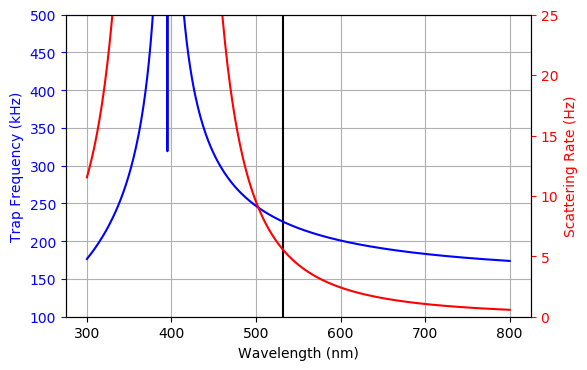

In [ ]:
fig,ax = plt.subplots(1,1,dpi=100)

ax.plot(lams*1e9,w_twz_r*1e-3/(2*np.pi),'b')
ax.vlines(532,100,1000,'k')

ax2=ax.twinx()
ax2.plot(lams*1e9,s,'r')

ax.set_ylim(100,500)
ax2.set_ylim(0,25)

ax.set_xlabel('Wavelength (nm)')
ax.set_ylabel('Trap Frequency (kHz)',color='b')
ax2.set_ylabel('Scattering Rate (Hz)',color='r')

ax.tick_params(axis='y', colors='b')
ax2.tick_params(axis='y', colors='r')

ax.grid()
plt.show()

## Sweep Power

In [ ]:
lam = 532*1e-9
omegas_twz = 2*pi*c/lam
Popts = np.linspace(0,100,100)*1e-3
w0 = 1e-6

w_twz_r,w_twz_a = tweezer_optical_potential_to_trap_frequency(lam,linewidths,omegares,Popts,w0,m)
s = scattering(omegas_twz,linewidths,omegares,Popts,w0)

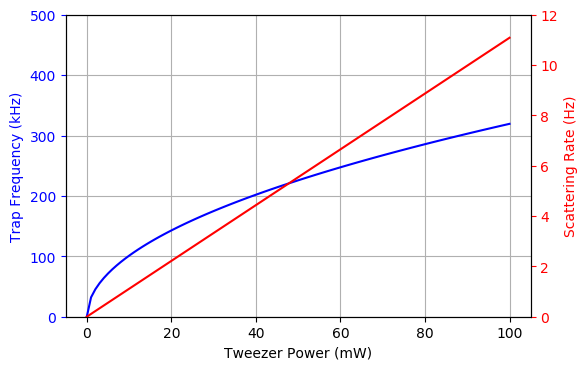

In [ ]:
fig,ax = plt.subplots(1,1,dpi=100)

ax.plot(Popts*1e3,w_twz_r*1e-3/(2*np.pi),'b')

ax2=ax.twinx()
ax2.plot(Popts*1e3,s,'r')

ax.set_ylim(0,500)
ax2.set_ylim(0,12)

ax.set_xlabel('Tweezer Power (mW)')
ax.set_ylabel('Trap Frequency (kHz)',color='b')
ax2.set_ylabel('Scattering Rate (Hz)',color='r')

ax.tick_params(axis='y', colors='b')
ax2.tick_params(axis='y', colors='r')

ax.grid()
plt.show()

## Sweep Size

In [ ]:
lam = 532*1e-9
omegas_twz = 2*pi*c/lam
Popt = 20*1e-3
w0s = np.linspace(0.5,5,100)*1e-6

w_twz_r,w_twz_a = tweezer_optical_potential_to_trap_frequency(lam,linewidths,omegares,Popt,w0s,m)
s = scattering(omegas_twz,linewidths,omegares,Popt,w0s)

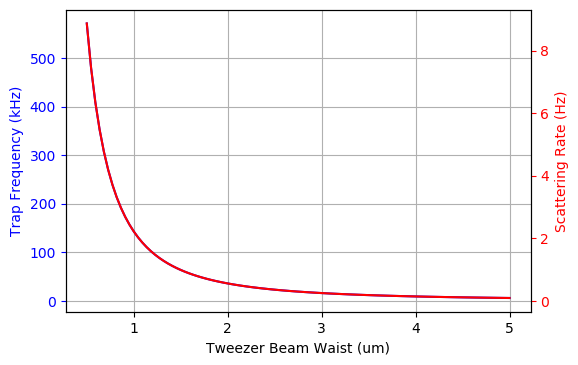

In [ ]:
fig,ax = plt.subplots(1,1,dpi=100)

ax.plot(w0s*1e6,w_twz_r*1e-3/(2*np.pi),'b')

ax2=ax.twinx()
ax2.plot(w0s*1e6,s,'r')

#ax.set_ylim(0,500)
#ax2.set_ylim(0,12)

ax.set_xlabel('Tweezer Beam Waist (um)')
ax.set_ylabel('Trap Frequency (kHz)',color='b')
ax2.set_ylabel('Scattering Rate (Hz)',color='r')

ax.tick_params(axis='y', colors='b')
ax2.tick_params(axis='y', colors='r')

ax.grid()
plt.show()

## Change in Radial Trap Frequencies

### All modes

In [ ]:
N = 5
tweezer_wavelength = 532e-9
w_rf_r = 1e6*2*pi
w_rf_a = 0.1e6*2*pi
Popts = np.linspace(0,50,100)*1e-3
w0=1e-6

Fs = np.zeros((N+1,len(Popts),N)) #[tweezed ion number, power, mode]

for j in range(len(Popts)):
    Fs[0,j,:] = [rm[0] for rm in physical_params_to_radial_mode_vectors(N,[],tweezer_wavelength,linewidths,omegares,w_rf_a,w_rf_r,Popts[j],w0,m)]

for i in range(N):
    for j in range(len(Popts)):
        Fs[i+1,j,:] = [rm[0] for rm in physical_params_to_radial_mode_vectors(N,[i],tweezer_wavelength,linewidths,omegares,w_rf_a,w_rf_r,Popts[j],w0,m)]
    
    

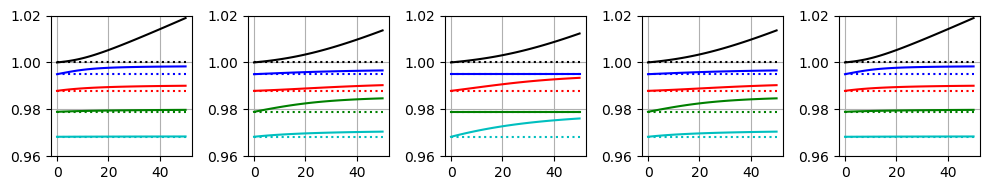

In [ ]:
fig,axs = plt.subplots(1,N,figsize=(10,2),dpi=100)

colors = ['k','b','r','g','c']

for i in range(N):
    for j in range(N):
        axs[j].plot(Popts*1e3,Fs[0,:,i]*1e-6,':'+colors[i])
        axs[j].plot(Popts*1e3,Fs[j+1,:,i]*1e-6,colors[i])

for a in axs:
    a.set_ylim(0.96,1.02)
    a.grid()

fig.tight_layout()
plt.show()

### Effect of trap frequencies on tweezer effect

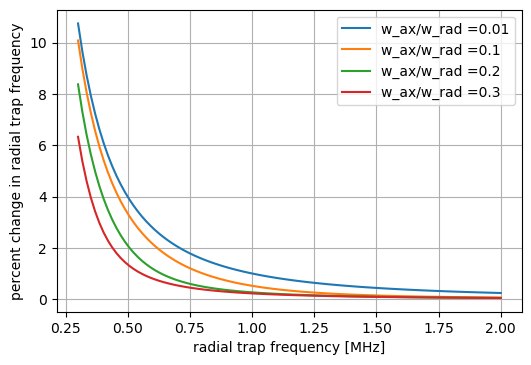

In [ ]:
N = 5
tweezer_wavelength = 532e-9
w_rf_rs = np.linspace(0.3,2,100)*1e6*2*pi
a_ratios = [0.01,0.1,0.2,0.3]
Popt = 20e-3
w0=1e-6

Fs = np.zeros((N+1,len(Popts),N)) #[tweezed ion number, power, mode]

Nt = 0

fig,ax = plt.subplots(1,1,dpi=100)

for a_ratio in a_ratios:
    fs = []
    for w_rf_r in w_rf_rs:
        w_rf_a = w_rf_r*a_ratio
        fs.append(physical_params_to_radial_mode_vectors(N,[i],tweezer_wavelength,linewidths,omegares,w_rf_a,w_rf_r,Popt,w0,m)[0][0])
    fs=np.array(fs)
    ax.plot(w_rf_rs*1e-6/(2*pi),(fs*2*pi/w_rf_rs-1)*100,label='w_ax/w_rad ='+str(a_ratio))

ax.set_xlabel('radial trap frequency [MHz]')
ax.set_ylabel('percent change in radial trap frequency')
ax.legend()
ax.grid()
plt.show()

## Change in Axial Trap Frequencies

In [ ]:
N = 5
tweezer_wavelength = 532e-9
w_rf_r = 1e6*2*pi
w_rf_a = 0.1e6*2*pi
Popts = np.linspace(0,50,100)*1e-3
w0=1e-6

Fs = np.zeros((N+1,len(Popts),N)) #[tweezed ion number, power, mode]

for j in range(len(Popts)):
    Fs[0,j,:] = [rm[0] for rm in physical_params_to_axial_mode_vectors(N,[],tweezer_wavelength,linewidths,omegares,w_rf_a,w_rf_r,Popts[j],w0,m)]

for i in range(N):
    for j in range(len(Popts)):
        Fs[i+1,j,:] = [rm[0] for rm in physical_params_to_axial_mode_vectors(N,[i],tweezer_wavelength,linewidths,omegares,w_rf_a,w_rf_r,Popts[j],w0,m)]
    
    

NameError: name 'physical_params_to_axial_mode_vectors' is not defined

# 24/11 Rithi making some figures

In [5]:
N = 1
x = np.empty(N)
omega_rf_axial = 1 * 2 * pi * 1e6
tweezed_ion = 0

# setting up parameters that we're not changing
NA = 0.1
tweezer_wavelength = 532e-9
omega_tweezer = 2*pi*c/tweezer_wavelength
df = pd.read_csv("S_P_only.csv",sep = ",",encoding = "UTF-8")
lambdares = np.array(df["wavelength (nm)"])*1e-9
omega_res = 2*pi*c/lambdares
linewidths = np.array(df["A_ki (s^-1)"])
lifetimes = linewidths

ionspacing = ion_spacing(N,omega_rf_axial)
print(ionspacing)


[array([0.]), []]


## single ion figures

### Ion Position/Tweezer Trap Frequency as a function of power and beam waist for a fixed tweezer displacement of 1 nm

/Users/ritika/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


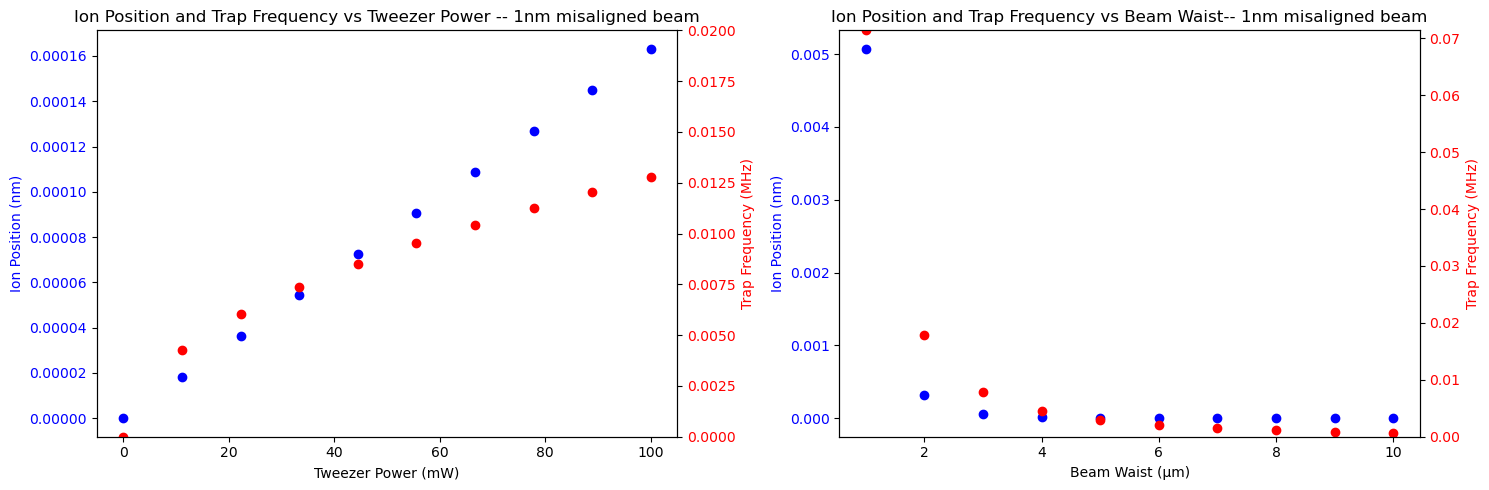

In [9]:
# First plot: P0 vs Ion Position
positions1 = []
omega_tw_radial1 = []
beam_waist_fixed = 5e-6 #arbitrarily picking a beam waist of 5 um
displacement = 1e-9 #arbitrarily picking a displacement of 1 nm
P0_values = np.linspace(0, 100, 10) * 1e-3 #going from 0 to 100 mW of power
for p in P0_values:
    omega_tw_radial = tweezer_optical_potential_to_trap_frequency(tweezer_wavelength,linewidths,omega_res,p,beam_waist_fixed,m)[0]
    tweeze_on = fsolve(pot_derivative_with_tweeze, ionspacing[0],
                       args=(omega_rf_axial, omega_tw_radial, tweezed_ion, displacement))
    positions1.append(tweeze_on[0])
    omega_tw_radial1.append(omega_tw_radial)
positions1 = np.array(positions1) * 1e9
freq_tw_radial1 = np.array(omega_tw_radial1) * 1e-6/(2*pi)

# Second plot: Beam Waist vs Ion Position
positions2 = []
omega_tw_radial2 = []
beam_waist_values = np.linspace(1, 10, 10) * 1e-6
P0_fixed = 5e-3
for bw in beam_waist_values:
    omega_tw_radial = tweezer_optical_potential_to_trap_frequency(tweezer_wavelength,linewidths,omega_res,P0_fixed,bw,m)[0]
    tweeze_on = fsolve(pot_derivative_with_tweeze, ionspacing[0],
                       args=(omega_rf_axial, omega_tw_radial, tweezed_ion, displacement))
    positions2.append(tweeze_on[0])
    omega_tw_radial2.append(omega_tw_radial)
positions2 = np.array(positions2) * 1e9
freq_tw_radial2 = np.array(omega_tw_radial2) * 1e-6/(2*pi)

# Define common y-axis ranges for positions and trap frequencies across all plots
position_y_min = min(positions1.min(), positions2.min())
position_y_max = max(positions1.max(), positions2.max())

frequency_y_min = min(freq_tw_radial1.min(), freq_tw_radial2.min())
frequency_y_max = max(freq_tw_radial1.max(), freq_tw_radial2.max())

# Plotting with unified y-axis scales
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# First subplot
ax1 = axs[0]
ax1.plot(P0_values * 1e3, positions1, 'o', color='blue', label='Ion Position')
ax1.set_xlabel('Tweezer Power (mW)')
ax1.set_ylabel('Ion Position (nm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
#ax1.set_ylim(position_y_min*1e-3, position_y_max)
ax1.set_title('Ion Position and Trap Frequency vs Tweezer Power -- 1nm misaligned beam')
ax2 = ax1.twinx()
ax2.plot(P0_values * 1e3, freq_tw_radial1, 'o', color='red', label='Trap Frequency')
ax2.set_ylabel('Trap Frequency (MHz)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(frequency_y_min, 0.02)

# Second subplot
ax1 = axs[1]
ax1.plot(beam_waist_values * 1e6, positions2, 'o', color='blue', label='Ion Position')
ax1.set_xlabel('Beam Waist (µm)')
ax1.set_ylabel('Ion Position (nm)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
#ax1.set_ylim(position_y_min, position_y_max)
ax1.set_title('Ion Position and Trap Frequency vs Beam Waist-- 1nm misaligned beam')
ax2 = ax1.twinx()
ax2.plot(beam_waist_values * 1e6, freq_tw_radial2, 'o', color='red', label='Trap Frequency')
ax2.set_ylabel('Trap Frequency (MHz)', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.set_ylim(frequency_y_min, frequency_y_max)

plt.tight_layout()
plt.show()


### Ion position/Tweezer Trap Frequency as a function of tweezer displacement

/Users/ritika/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:178: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


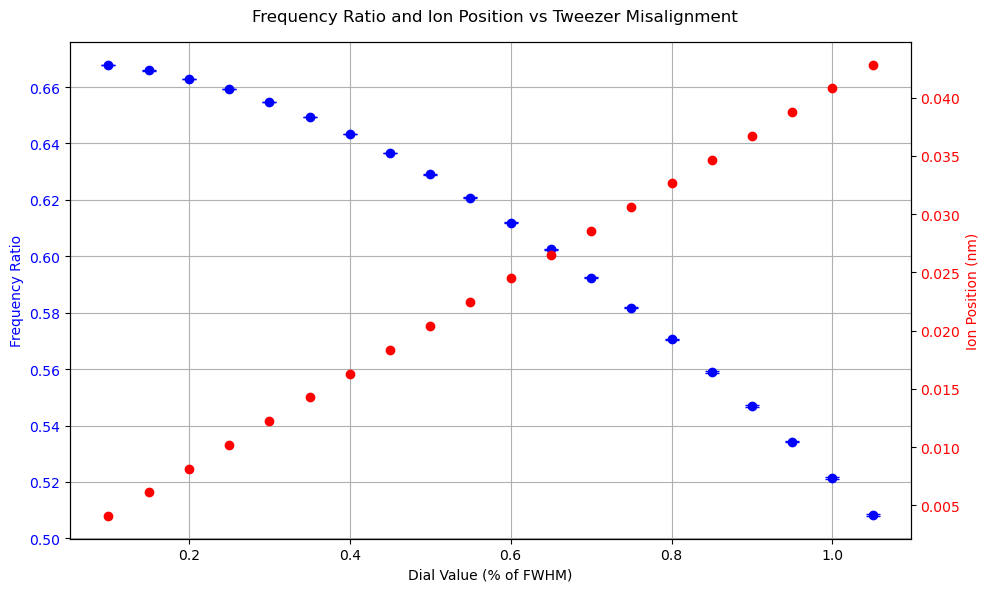

In [11]:
from scipy.optimize import curve_fit
# Dial values for both calculations
dial_values = np.arange(0.1, 1.1, 0.05)
ratios = []
errors = []
positions3 = []
omega_tw_radial3 = []

def quadratic(x,a,b):
    return a+b*(x**2)

for dial in dial_values:
    # Intensity and frequency ratio
    r_max = (beam_waist_fixed / 2) * (dial + dial * 0.025)
    r_min = (beam_waist_fixed / 2) * (dial - dial * 0.025)
    r_pos = np.linspace(r_min, r_max, 100)

    int_vals = intensity(P0_fixed, beam_waist_fixed, 0, r_pos, tweezer_wavelength)
    ydata = potential_position_dependent(omega_res, linewidths, tweezer_wavelength, int_vals)

    xdata = r_pos
    popt, pcov = curve_fit(quadratic, xdata, ydata)
    fit = np.sqrt(2 * popt[1] / m)
    perr = np.sqrt(np.diag(pcov))
    fit_error = np.abs(fit * (perr[1] / popt[1]))

    analytical = tweezer_optical_potential_to_trap_frequency(tweezer_wavelength, linewidths, omega_res, P0_fixed, beam_waist_fixed, m)
    ratio = fit / analytical[0]
    ratio_error = fit_error / analytical[0]

    ratios.append(ratio)
    errors.append(ratio_error)

    # Displacement and ion position
    displacement = beam_waist_fixed * dial
    omega_tw_radial = tweezer_optical_potential_to_trap_frequency(tweezer_wavelength, linewidths, omega_res, P0_fixed, beam_waist_fixed, m)[0]
    tweeze_on = fsolve(pot_derivative_with_tweeze, ionspacing[0], args=(omega_rf_axial, omega_tw_radial, tweezed_ion, displacement))
    positions3.append(tweeze_on[0])
    omega_tw_radial3.append(omega_tw_radial)

positions3 = np.array(positions3) * 1e9  # Convert to nm
freq_tw_radial3 = np.array(omega_tw_radial3) * 1e-6 / (2 * np.pi)  # Convert to MHz

# Unified plot
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot dial values vs frequency ratio
ax1.errorbar(dial_values, ratios, yerr=errors, fmt='o', label='Fit/Analytical Frequency Ratio', color='blue', capsize=5)
ax1.set_xlabel('Dial Value (% of FWHM)')
ax1.set_ylabel('Frequency Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Secondary axis for displacement vs ion position
ax2 = ax1.twinx()
ax2.plot(dial_values, positions3, 'o', color='red', label='Ion Position')
ax2.set_ylabel('Ion Position (nm)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add grid, legend, and title
fig.suptitle('Frequency Ratio and Ion Position vs Tweezer Misalignment')
ax1.grid(True)
fig.tight_layout()

plt.show()

## 2 ion 1 tweezer on one ion

### change in eq positions as a function of power, only tweezing ion0 

In [8]:
N = 2
tweezed_ion = 0
ion_number = np.arange(0,N)
print(ion_number)

# First plot: P0 vs Ion Position
positions21 = []
positions22 = []
positions_by_p = []
omega_tw_radial1 = []
beam_waist_fixed = 5e-6 #arbitrarily picking a beam waist of 5 um
displacement = 1e-9 #arbitrarily picking a displacement of 1 nm
P0_values = np.linspace(0, 1000, 3) * 1e-3 #going from 0 to 100 mW of power
for p in P0_values:
    omega_tw_radial = tweezer_optical_potential_to_trap_frequency(tweezer_wavelength,linewidths,omega_res,p,beam_waist_fixed,m)[0]
    tweeze_on = fsolve(pot_derivative_with_tweeze, ionspacing[0],
                       args=(omega_rf_axial, omega_tw_radial, tweezed_ion, displacement))
    positions21.append(tweeze_on[0])
    positions22.append(tweeze_on[1])
    positions_by_p.append(list(tweeze_on))
    omega_tw_radial1.append(omega_tw_radial)
positions21 = np.array(positions21) * 1e9
positions22 = np.array(positions22) * 1e9
freq_tw_radial1 = np.array(omega_tw_radial1) * 1e-6/(2*pi)


fig, ax = plt.subplots(figsize=(10, 6))
# Loop through the positions and plot for each P0 value
for i, positions in enumerate(positions_by_p):
    ax.plot(
        ion_number, 
        np.array(positions) * 1e9,  # Convert positions to nm
        'o',  # Line and point marker
        label=f'P0={P0_values[i]*1e3:.1f} mW'  # Label with power
    )

# Labeling
plt.ylabel('Ion Position (nm)')
plt.xlabel('Ion Number')
plt.title('Ion Positions vs Laser Power')
plt.legend(title='Laser Power')
plt.show()

[0 1]


IndexError: index 1 is out of bounds for axis 0 with size 1

### change in motional modes from 2 ions 

In [15]:
P_opt = np.linspace(0,1000,5)*1e-3 #going from 0 to 100 mW 
w_rf_r =2 *pi*1e6
w_rf_a = w_rf_r / 8
print(P_opt)
all_modes_0 = []

for j in range(len(P_opt)):
    all_modes_0.append(physical_params_to_radial_mode_vectors(N,[0],tweezer_wavelength,linewidths,omega_res,w_rf_a,w_rf_r,P_opt[j],beam_waist_fixed,m))

# Initialize empty lists for e_freqs and Modes
e_freqs_0 = [[] for _ in range(len(all_modes_0[0]))]
Modes_0 = [[] for _ in range(len(all_modes_0[0]))]


# Loop through the data and extract frequencies and modes
for i in range(len(all_modes_0)):
    for j in range(len(all_modes_0[i])):
        e_freqs_0[j].append(all_modes_0[i][j][0])
        Modes_0[j].append(all_modes_0[i][j][1]) 

all_modes_1 = []

for j in range(len(P_opt)):
    all_modes_1.append(physical_params_to_radial_mode_vectors(N,[1],tweezer_wavelength,linewidths,omega_res,w_rf_a,w_rf_r,P_opt[j],beam_waist_fixed,m))

# Initialize empty lists for e_freqs and Modes
e_freqs_1 = [[] for _ in range(len(all_modes_1[0]))]
Modes_1 = [[] for _ in range(len(all_modes_1[0]))]


# Loop through the data and extract frequencies and modes
for i in range(len(all_modes_1)):
    for j in range(len(all_modes_1[i])):
        e_freqs_1[j].append(all_modes_1[i][j][0])
        Modes_1[j].append(all_modes_1[i][j][1]) 

[0.   0.25 0.5  0.75 1.  ]


TypeError: mode_calc_r() missing 1 required positional argument: 'N'

In [20]:
physical_params_to_radial_mode_vectors(N,[0],tweezer_wavelength,linewidths,omega_res,w_rf_a,w_rf_r,P_opt,beam_waist_fixed,m)

ValueError: shape mismatch: value array of shape (5,) could not be broadcast to indexing result of shape (1,)

In [22]:
individual_freqs_to_mode_vectors(2,[0],300*1e3,100*1e3,w_rf_r,w_rf_a)

TypeError: mode_calc_r() missing 1 required positional argument: 'N'

In [ ]:
mode_calc_r()